# Curved lines in `obplib` <img align="right" width="192" height="64" src="https://freemelt.com/app/uploads/freemeltLogo-1.png">
In the first parts of this guide, `Line` objects were the bread and butter. From making a square, through cuboids and honeycombs to island melting, straight line melting was the go-to. However, straight line melting is not the only melting pattern that `opblib` offers. Freemelt machines have the unique capability to melt Bézier curves, and this guide will show how to do that.

As always, the relevant libraries are imported:

In [1]:
import obplib as obp
import notebook_viewer as nw
import numpy as np

## Curved lines
Bézier curves are a widely used choice for modeling smooth curves computationally. Their appealing traits include creating continuous curves with minimal input for efficient storage and manipulation of complex shapes. They can also be scaled indefinitely, allowing for easy transformations.

Bézier curves are polynomial approximations of functions with an *order* $n$, where the coefficients are determined by $n + 1$ *control points*. These control points dictate the curve's trajectory and shape, with the first and last points defining the curve's start and end, while intermediate points influence its curvature and direction. These control points act as "anchors" or "handles" that pull the curve towards their position. The most common orders are 1, 2 and 3, who are called linear, quadratic and cubic, respectively. In the `opblib` library, the Bézier curve of choice is the cubic one, defined by four points represented as `Point` objects. 

|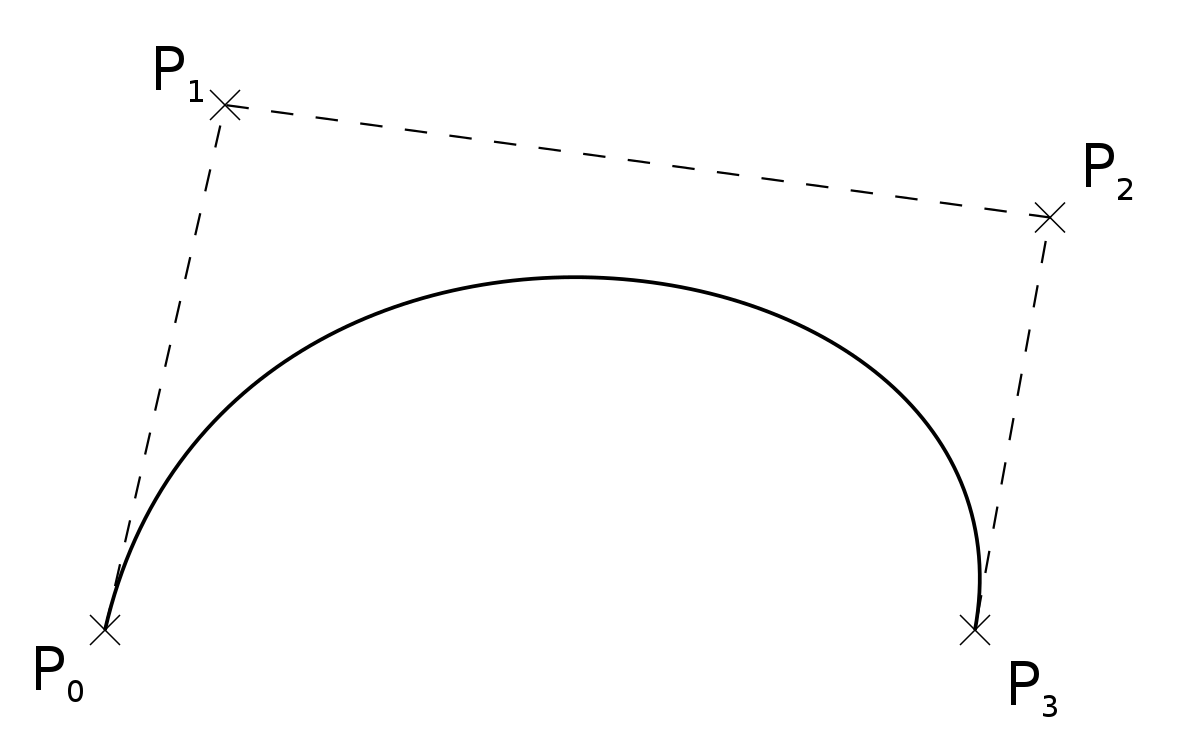|
|:--:|
|[Cubic Bézier curve with control points](https://en.wikipedia.org/wiki/B%C3%A9zier_curve#/media/File:Bezier_curve.svg)|

For the curious who desire a better intuition of Bézier curves, a good introduction can be found [here](https://mmrndev.medium.com/understanding-b%C3%A9zier-curves-f6eaa0fa6c7d).

### Example - Simple cubic Bézier curve
In this example, a cubic Bézier curve with four control points is defined and plotted. The control points are visualized as upside-down stars on the plot. The last control point is also the endpoint of the curve, represented by a larger, regular star symbol.

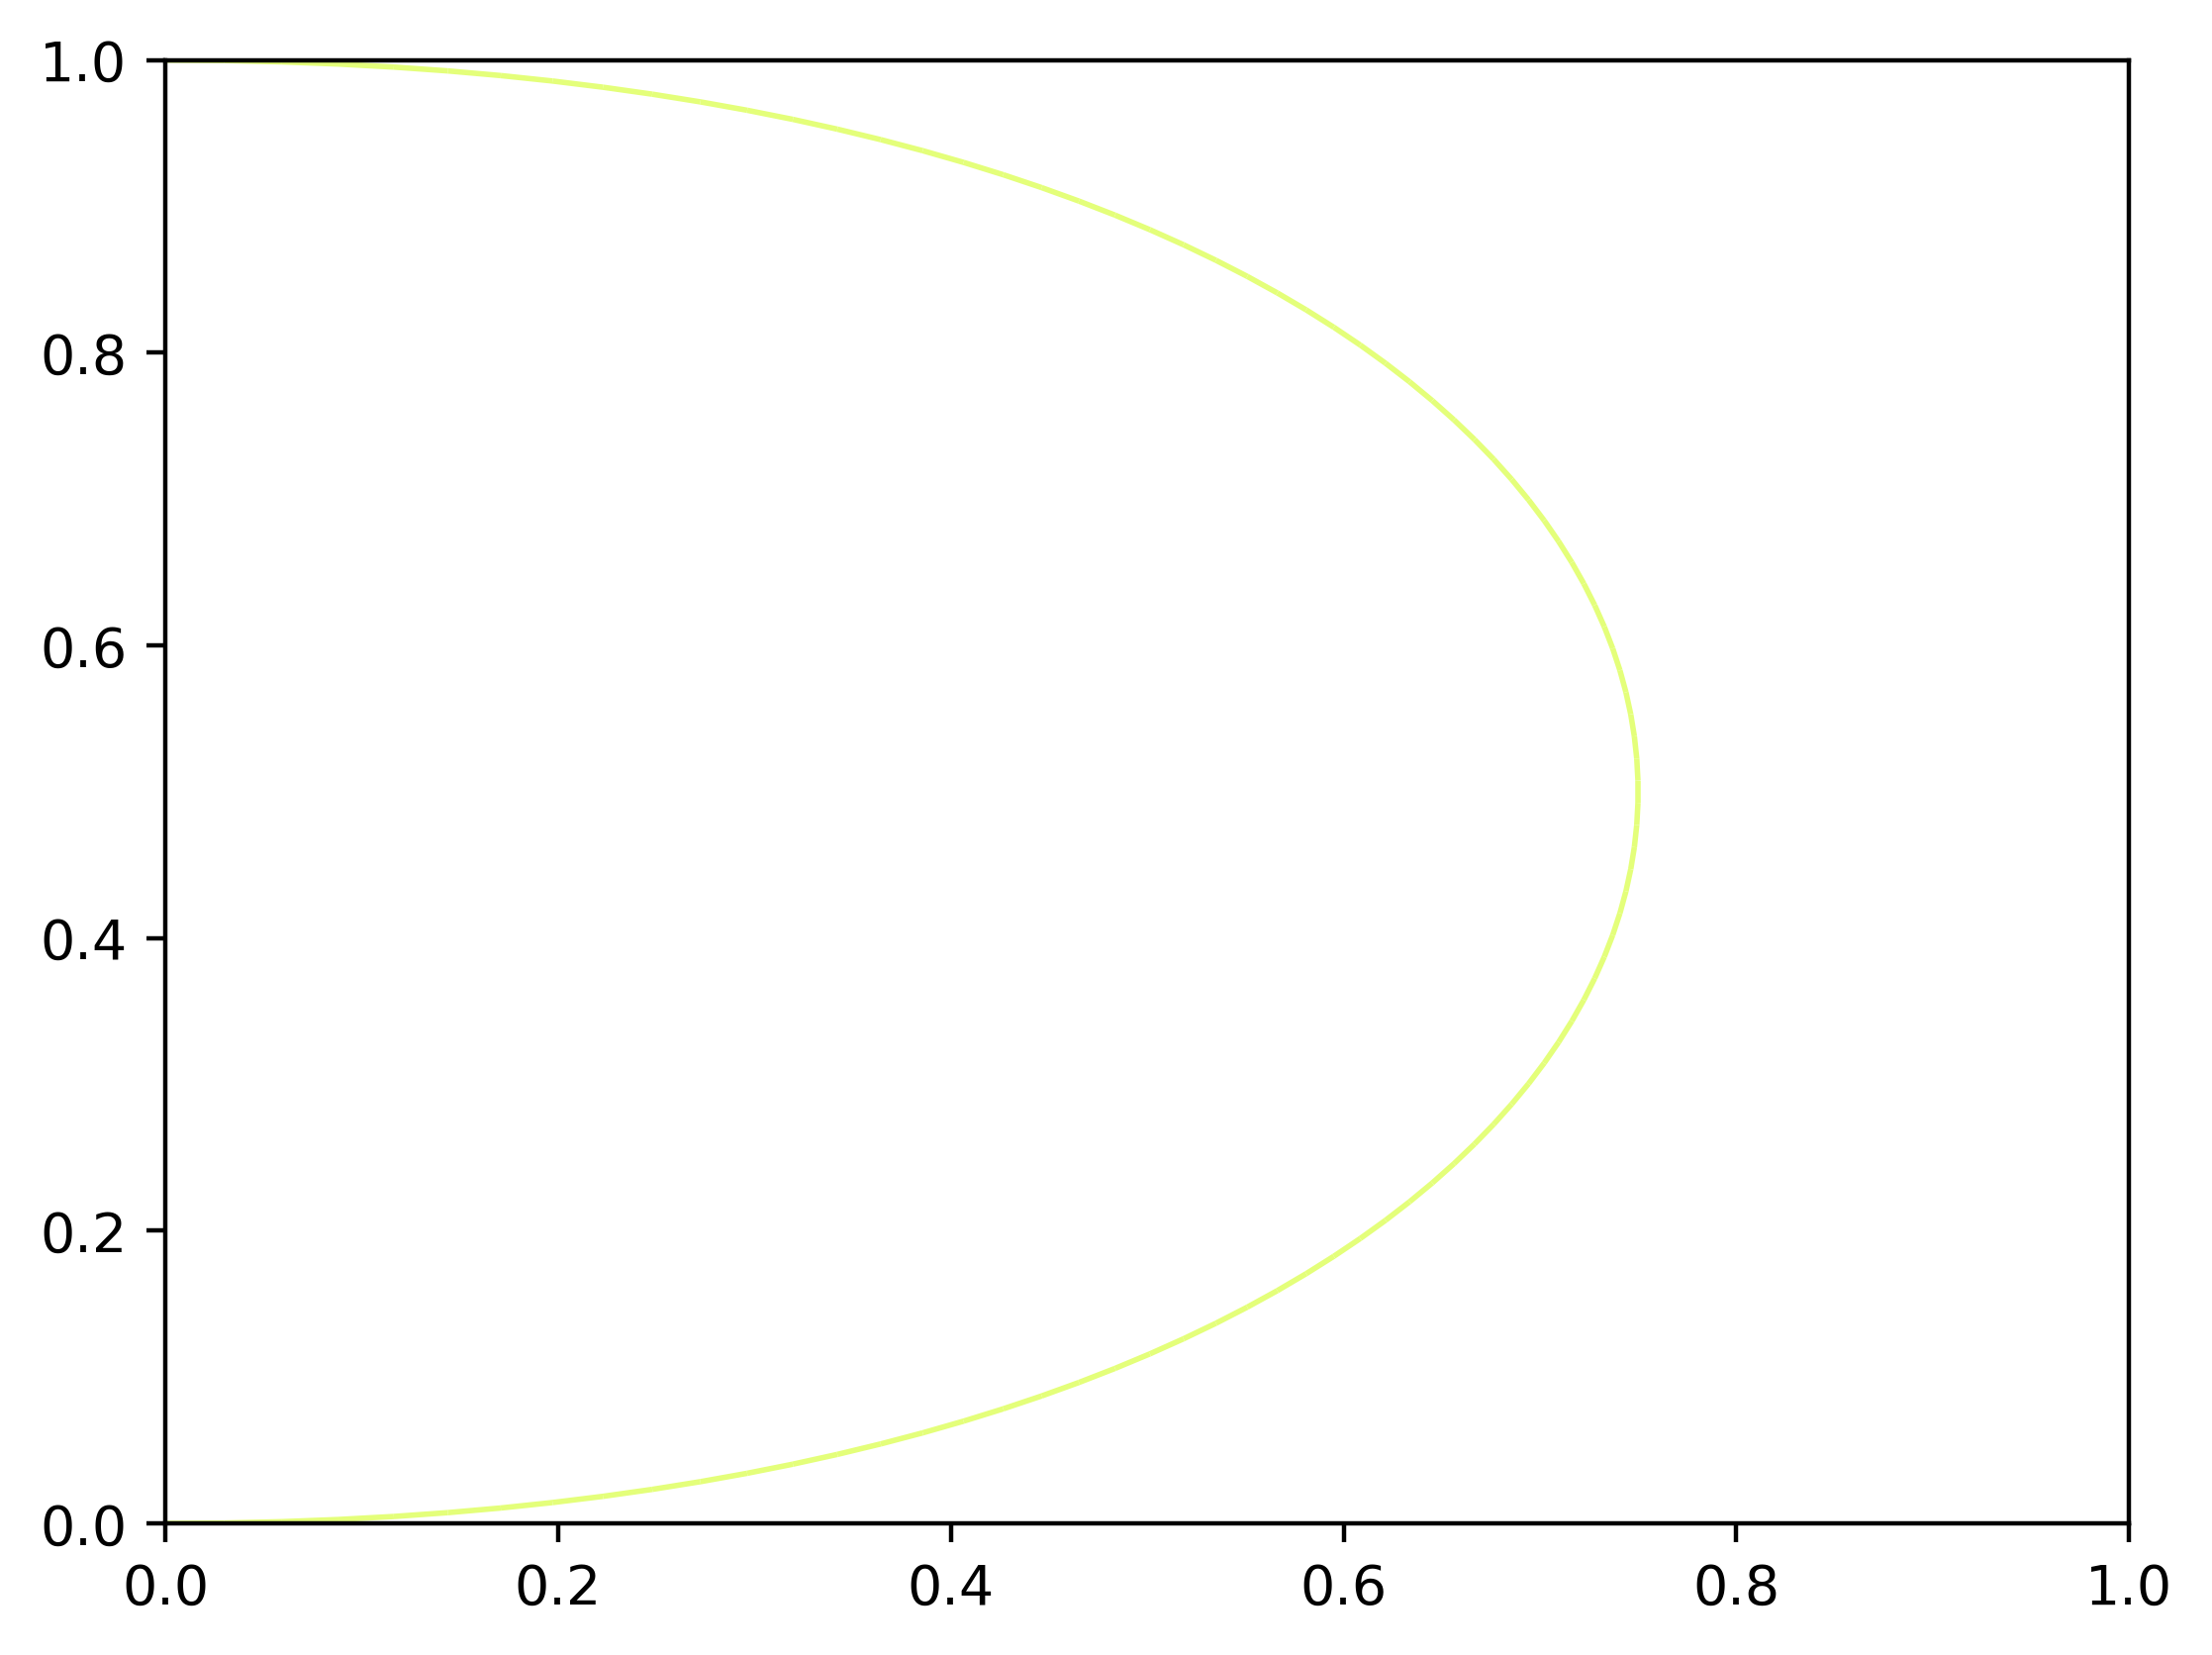

interactive(children=(IntSlider(value=1, description='upper_lim', max=1, min=1), IntText(value=1, description=…

In [2]:
p_1 = obp.Point(0, 0)
p_2 = obp.Point(1, 0)
p_3 = obp.Point(1, 1)
p_4 = obp.Point(0, 1)

control_points = [p_1, p_2, p_3, p_4] #four points for a simple cubic Bézier curve

cur = [obp.Curve(control_points[0], control_points[1], control_points[2], control_points[3], speed = 100, bp = obp.Beamparameters(spot_size = 100, power = 100))]

nw.notebook_viewer(cur, show_control_points = True)

## Circles using Bézier curves
Melting using concentric circles is a common way to achieve cylindric builds such as test rods. Circles can be approximated through [this method](https://spencermortensen.com/articles/bezier-circle/): divide the circle into four equiangular parts and replace each part with a cubic Bézier curve according to this picture:

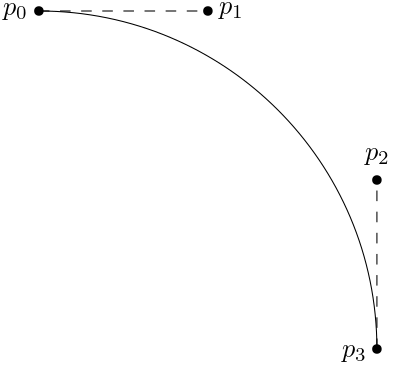

The control points are assigned as follows:

$p_0 = (0, a), p_1 = (b, c), p_2 = (c, b), p_3 = (a, 0)$,

with $a = 1.00005519, b = 0.55342686, c = 0.99873585$. 

These control points are then 
1. Scalar multiplied by a radius to scale the circle.
2. Mirrored in the x and y axis to complete the circle.
3. Translated to place the circle.

### Example - Two circles
In this example, two circles are created and placed. This would ideally be done within a class to centralize all functionalities and facilitate further development. For inspiration about how to do this, consult the guides [here](https://mybinder.org/v2/gh/olofficial/hex-test/main?labpath=cubes.ipynb), [here](https://mybinder.org/v2/gh/olofficial/hex-test/main?labpath=honeycomb.ipynb) and [here](https://mybinder.org/v2/gh/olofficial/hex-test/labpath=islands.ipynb).


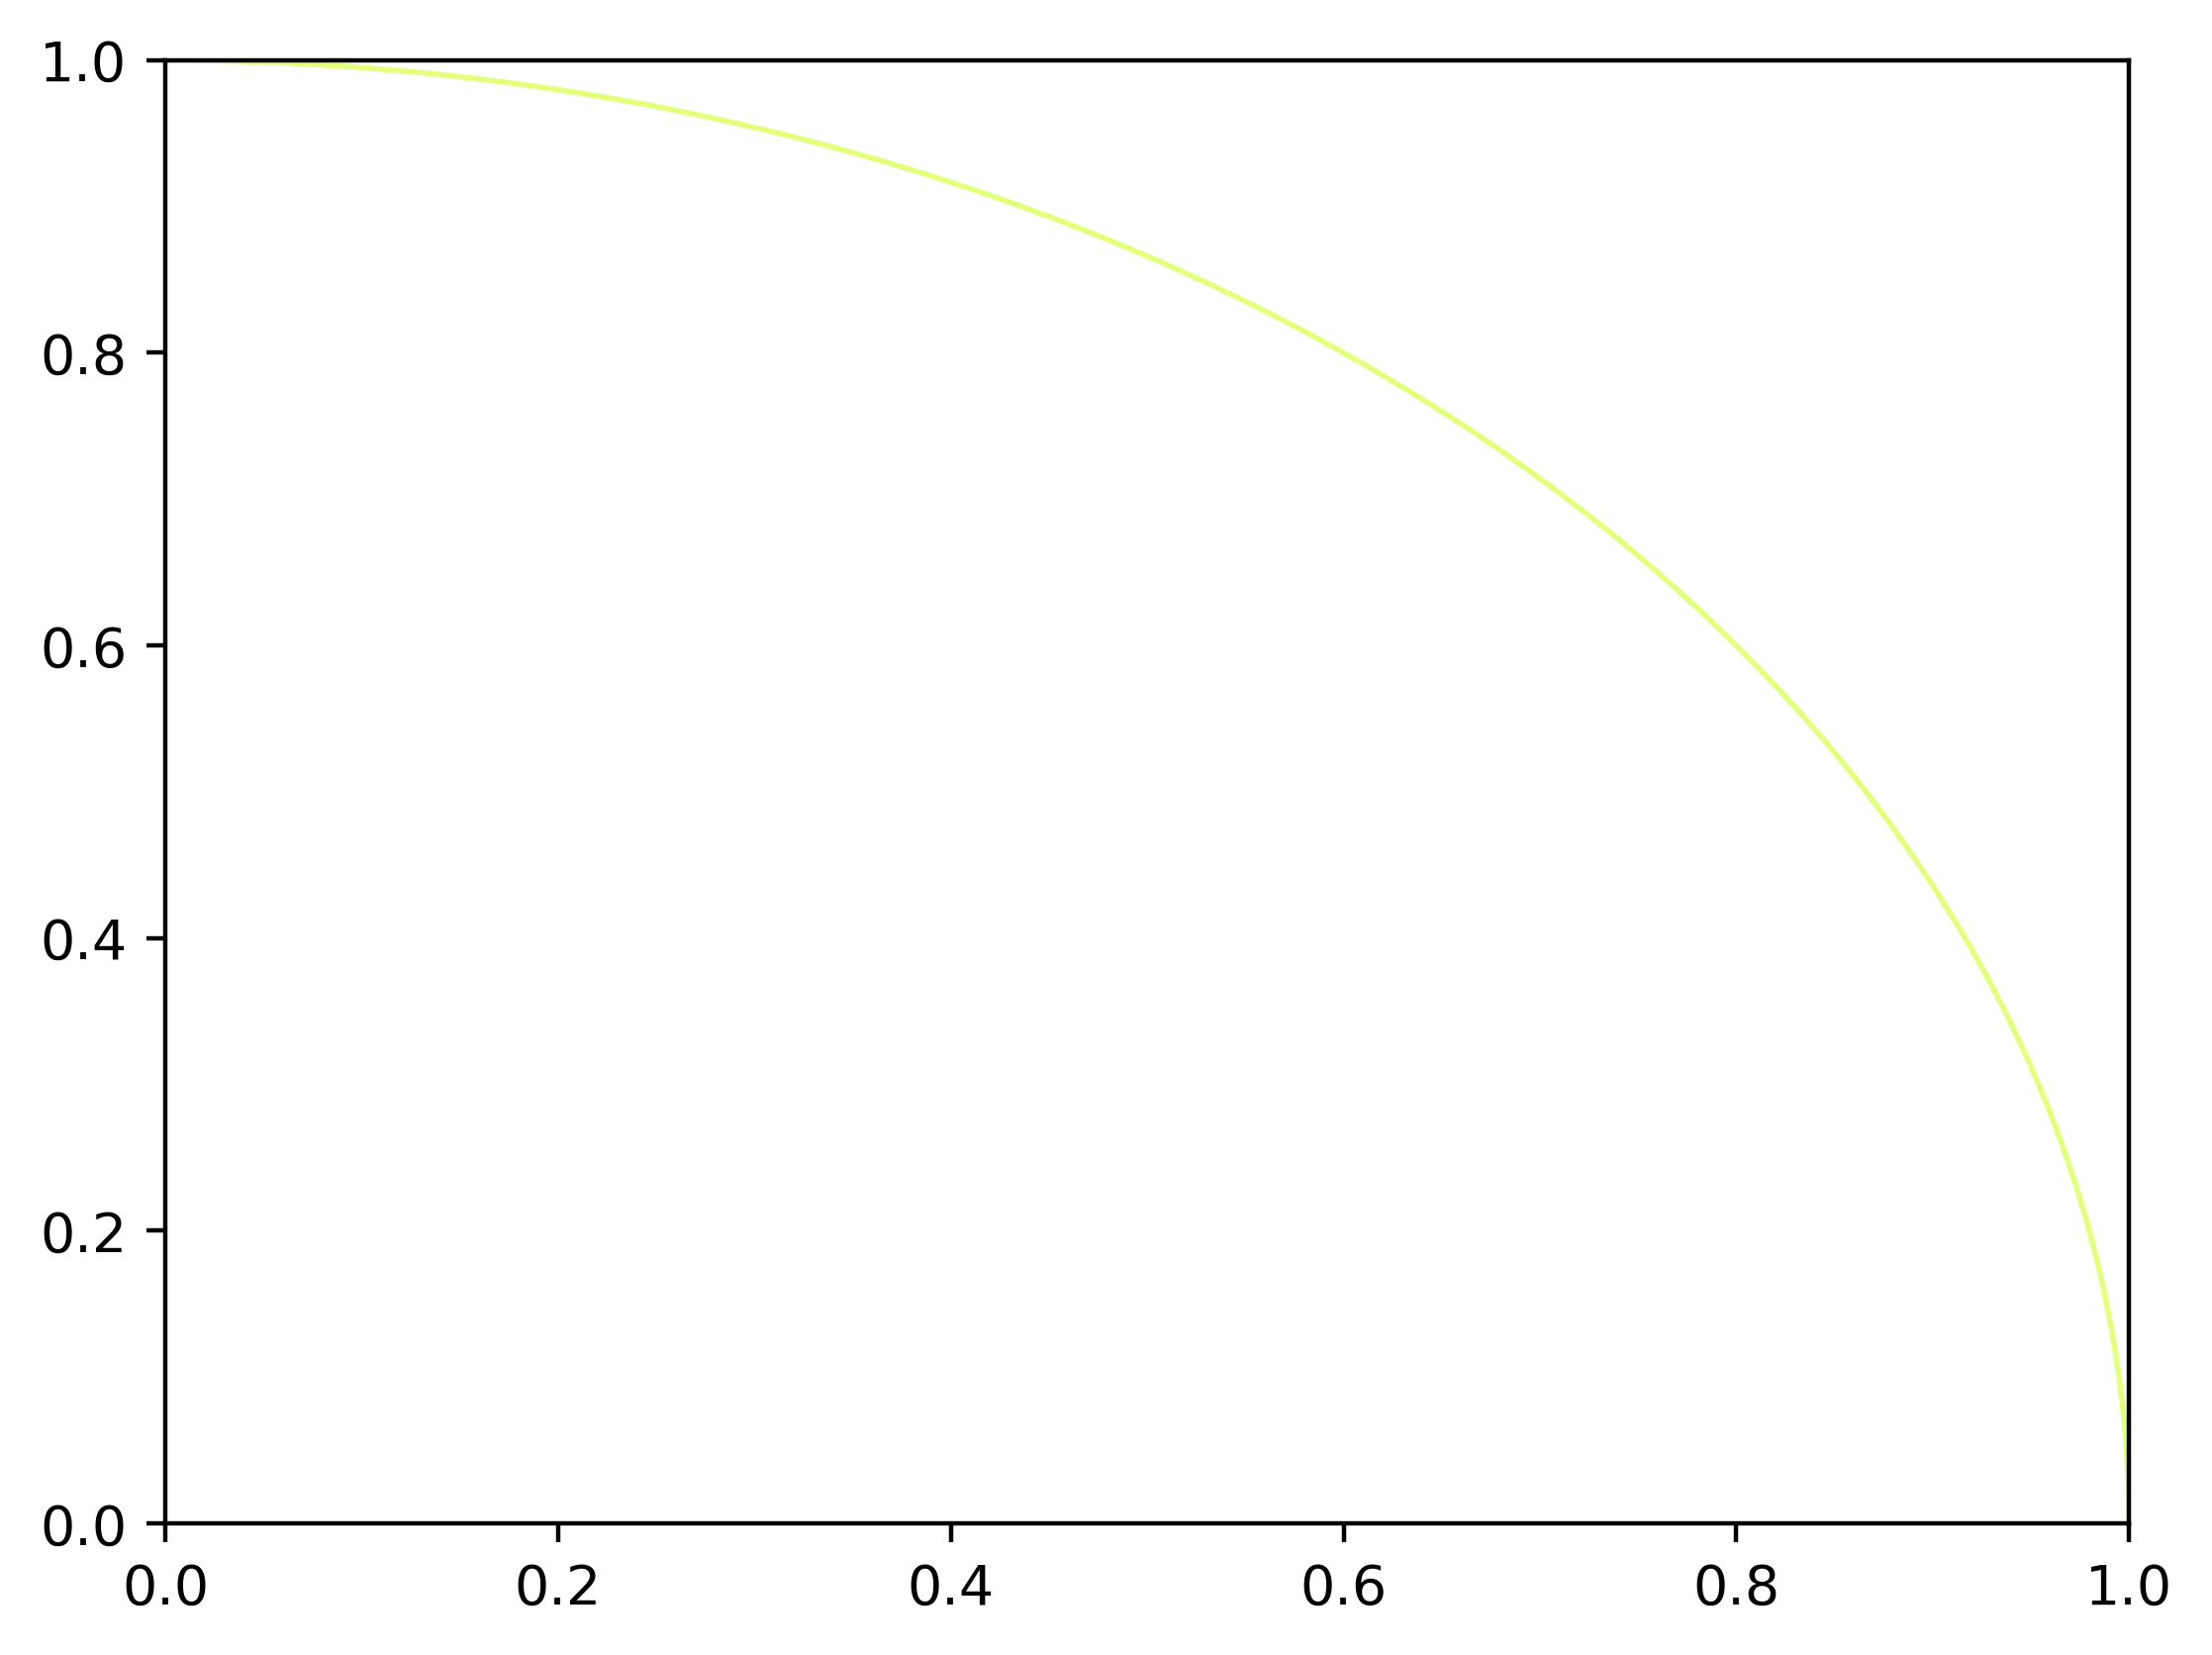

interactive(children=(IntSlider(value=4, description='upper_lim', max=8, min=1), IntText(value=8, description=…

In [3]:
def bezier_circle(midpoint = [0, 0], radius = 1):
    a, b, c = 1.00005519, 0.55342686, 0.99873585
    curves = []
    for i in range(2):
        for j in range(2):
            control_coordinates = [[0, a], [b, c], [c, b], [a, 0]]
            control_coordinates = [np.multiply(control_coordinates[i], radius) for i in range(len(control_coordinates))] #scale with radius
            #mirroring the control points in the x and y plane to create the four parts
            if i == 1:
                control_coordinates = [[np.multiply(control_coordinates[i][0], -1), control_coordinates[i][1]] for i in range(len(control_coordinates))]
            if j == 1:
                control_coordinates = [[control_coordinates[i][0], np.multiply(control_coordinates[i][1], -1)]  for i in range(len(control_coordinates))]
            control_coordinates = [np.add(control_coordinates[i], midpoint) for i in range(len(control_coordinates))] #translate midpoint
            control_points = [obp.Point(control_coordinates[i][0], control_coordinates[i][1]) for i in range(len(control_coordinates))] #create Point objects
            curves.append(obp.Curve(control_points[0], control_points[1], control_points[2], control_points[3], speed = 100, bp = obp.Beamparameters(spot_size = 100, power = 100))) #create circle segments
    return curves

cur_2 = bezier_circle() #create a circle
cur_2 = cur_2 + bezier_circle(midpoint = [1, 1], radius = 2) #create a second circle

nw.notebook_viewer(cur_2, show_control_points = True)

### Example - Combining `Curve` and `Line` objects
If the user wishes to combine curved and straight lines, this is easy to do. Consider a half circle shape:

![half circle-2.png](<attachment:half circle-2.png>)

This can be constructed by placing two quarter circle segments and one line segment.

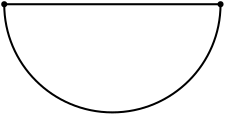

In [5]:
def bezier_half_circle(midpoint = [0, 0], radius = 1):
    a, b, c = 1.00005519, 0.55342686, 0.99873585
    curves = []
    for i in range(2):
        control_coordinates = [[0, -a], [b, -c], [c, -b], [a, -0]] #mirroring in the y axis
        control_coordinates = [np.multiply(control_coordinates[i], radius) for i in range(len(control_coordinates))] #scale with radius
        #mirroring the control points in the x and y plane to create the four parts
        if i == 1:
            control_coordinates = [[np.multiply(control_coordinates[i][0], -1), control_coordinates[i][1]] for i in range(len(control_coordinates))]
        control_coordinates = [np.add(control_coordinates[i], midpoint) for i in range(len(control_coordinates))] #translate midpoint
        control_points = [obp.Point(control_coordinates[i][0], control_coordinates[i][1]) for i in range(len(control_coordinates))] #create Point objects
        curves.append(obp.Curve(control_points[0], control_points[1], control_points[2], control_points[3], speed = 100, bp = obp.Beamparameters(spot_size = 100, power = 100))) #create circle segments
    line_points = [obp.Point(-a, 0), obp.Point(a, 0)]
    curves.append(obp.Line(line_points[0], line_points[1], Speed = 100, bp = obp.Beamparameters(spot_size = 100, power = 100)))
    return curves

cur_3 = bezier_half_circle()
nw.notebook_viewer(cur_3)

interactive(children=(IntSlider(value=2, description='upper_lim', max=3, min=1), IntText(value=3, description=…